This notebook is to run SVM machine learning algorithm

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
matchs = pd.read_csv("IPL_Matches_2008_2022.csv")
matchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [23]:
matchs['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [24]:
matchs['method'].unique()

array([nan, 'D/L'], dtype=object)

In [25]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]
matchs['Team1'] = matchs['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matchs['Team2'] = matchs['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matchs['WinningTeam'] = matchs['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matchs['Team1'] = matchs['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matchs['Team2'] = matchs['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matchs['WinningTeam'] = matchs['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matchs['Team1'] = matchs['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matchs['Team2'] = matchs['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matchs['WinningTeam'] = matchs['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matchs = matchs[matchs['Team1'].isin(teams)]
matchs = matchs[matchs['Team2'].isin(teams)]
matchs = matchs[matchs['WinningTeam'].isin(teams)]

In [26]:
matchs.to_csv("ipl_revelant_data.csv")

In [27]:
matchs = matchs[matchs['method'].isna()]
matchs = matchs[['City','Team1','Team2','WinningTeam']].dropna()
matchs.to_csv("ipl_revelant_data.csv")

In [28]:
from sklearn import preprocessing
le_city = preprocessing.LabelEncoder()
le_team1 = preprocessing.LabelEncoder()
le_team2 = preprocessing.LabelEncoder()
le_winning = preprocessing.LabelEncoder()
matchs['City'] = le_city.fit_transform(matchs['City'])
matchs['Team1'] = le_team1.fit_transform(matchs['Team1'])
matchs['Team2'] = le_team2.fit_transform(matchs['Team2'])
matchs['WinningTeam'] = le_winning.fit_transform(matchs['WinningTeam'])
matchs.to_csv("encoded.csv")

In [29]:
from sklearn.model_selection import train_test_split
X = matchs.drop('WinningTeam', axis=1)
y = matchs['WinningTeam']
X.shape, y.shape

((766, 3), (766,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.50      0.27      0.35        26
           2       0.00      0.00      0.00         2
           3       0.50      0.40      0.44        20
           4       0.00      0.00      0.00         1
           5       0.42      0.53      0.47        19
           6       0.38      0.33      0.35        18
           7       0.50      0.44      0.47        16
           8       0.45      0.56      0.50        18
           9       0.35      0.38      0.36        16

    accuracy                           0.45       154
   macro avg       0.37      0.38      0.36       154
weighted avg       0.45      0.45      0.44       154



c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test_scaled)

scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)
print(f'Cross-validated Accuracy: {scores.mean():.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Cross-validated Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.78      0.61        18
           1       0.45      0.19      0.27        26
           2       1.00      1.00      1.00         2
           3       0.42      0.55      0.48        20
           4       0.00      0.00      0.00         1
           5       0.50      0.58      0.54        19
           6       0.27      0.22      0.24        18
           7       0.57      0.50      0.53        16
           8       0.50      0.50      0.50        18
           9       0.41      0.44      0.42        16

    accuracy                           0.46       154
   macro avg       0.46      0.48      0.46       154
weighted avg       0.46      0.46      0.44       154



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

svm = SVC(random_state=0)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_svm_tuned = best_estimator.predict(X_test)

performance(best_estimator, X_train, y_train, y_pred_svm_tuned, y_test)


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Training Score: 0.2764350453172205
Testing Score: 0.13028169014084506
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.40      0.20        30
           1       0.00      0.00      0.00         8
           2       0.25      0.07      0.11        14
           3       0.50      0.04      0.07        26
           4       0.50      0.40      0.44         5
           5       0.18      1.00      0.30         3
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00         1
           8       0.09      0.09      0.09        35
           9       0.00      0.00      0.00         3
          10       0.17      0.12      0.14        42
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.23      0.09      0.13        33
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.0

c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [ ]:
import pandas as pd
df = pd.read_csv('IPL_Matches_2008_2022.csv')
threshold = 950

df_dropped = df.dropna(thresh=threshold, axis=1)

df_dropped


,ID,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WonBy,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Wickets,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Runs,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Wickets,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Wickets,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Wickets,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Wickets,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Runs,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [ ]:
df_dropped

,ID,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WonBy,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Wickets,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Runs,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Wickets,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Wickets,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Wickets,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Wickets,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Runs,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

def calculate_mape(y_true, y_pred):
    return (1/len(y_true)) * sum(abs((y_true - y_pred) / y_true)) * 100

csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

target_variable = 'WonBy'

df_cleaned = df.dropna(thresh=950, axis=1)

selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

y_test_pred = regressor_svm.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = calculate_mape(y_test, y_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

results_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'Mean Absolute Error', 'Mean Absolute Percentage Error'],
    'Value': [mse, r2, mae, mape]
})
results_df

Mean Squared Error: 1.22831401506384
R-squared (R²): -0.25668516207466774
Mean Absolute Error (MAE): 0.9619874764375057
Mean Absolute Percentage Error (MAPE): inf%


C:\Users\NEW\AppData\Local\Temp\ipykernel_8524\2391313344.py:10: RuntimeWarning: divide by zero encountered in divide
  return (1/len(y_true)) * sum(abs((y_true - y_pred) / y_true)) * 100


,Metric,Value
0,Mean Squared Error,1.228314
1,R-squared,-0.256685
2,Mean Absolute Error,0.961987
3,Mean Absolute Percentage Error,inf


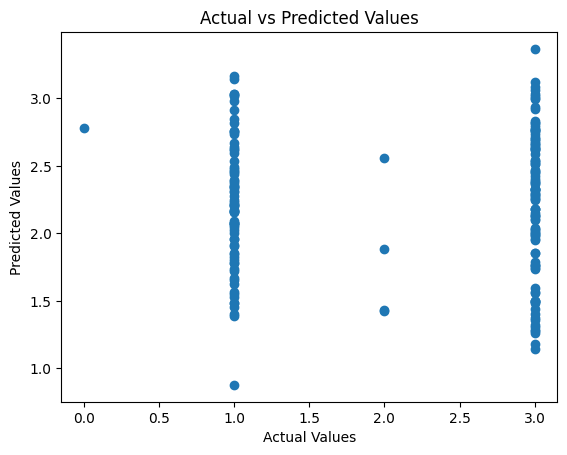

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
